> **DO YOU USE GITHUB?**  
If True: print('Remember to make your edits in a personal copy of this notebook')  
Else: print('You don't have to understand. Continue your life.')

# Module 8: Web Scraping 3

Now you know how to investigate, download and parse data from a website. Thank you module_6 and module_7. Though, you might still run into websites you are having a difficult time scraping. Getting thorugh such cahllenge using automated browsing will be the main topic of this module. 

We will continue to learn new techniques of parsing unstructured text and HTML. This will help you build ***custom datasets*** within just a few hours or days work, that would have taken ***months*** to curate and clean manually. We will learn how to automate browsing and use regex to parse text without html tags.


Readings for `module 6+7+8`:
- [Python for Data Analysis, chapter 6](https://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf)
- [A Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)
- [An introduction to web scraping with Python](https://towardsdatascience.com/an-introduction-to-web-scraping-with-python-a2601e8619e5)
- [Introduction to Web Scraping using Selenium](https://medium.com/the-andela-way/introduction-to-web-scraping-using-selenium-7ec377a8cf72)

Video materiale from `ISDS 2020`:
- [Web Scraping 1](https://bit.ly/ISDS2021_6)
- [Web Scraping 2](https://bit.ly/ISDS2021_7)
- [Web Scraping 3](https://bit.ly/ISDS2021_8)

Other ressources:
- [Nicklas Webpage](https://nicklasjohansen.netlify.app/)
- [Data Driven Organizational Analysis, Fall 2021](https://efteruddannelse.kurser.ku.dk/course/2021-2022/ASTK18379U)
- [Master of Science (MSc) in Social Data Science](https://www.socialdatascience.dk/education)


## Interactions and Automated Browsing
Sometimes scraping tasks demand interactions (e.g. login, scrolling, clicking), and a no XHR data can be found easily, so you need the browser to execute the scripts before you can get the data. XHR is short for XMLHttpRequest - a JavaScript API - like the one we found in the jobnet.dk exerise.

Here we use the `Selenium` package in combination with the `ChromeDriver` - you can download the latest release [here](https://chromedriver.chromium.org/downloads). It allows you to animate a browser. 

Make sure to download the driver as well as the newest version of Selenium. "pip install selenium" should do the trick. 

Some developers prefer to you [geckodriver](https://github.com/mozilla/geckodriver/releases) as an alternative to `ChromeDriver`.


In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager


url = 'https:google.com'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)

In [ ]:
# You can also download the driver to your computer
# Save it in your working directory and write the code

import os
#directory = os.getcwd()
#path = os.path.join(directory, 'chromedriver')
url = 'https:google.com'

path = '/Users/simonjuulhansen/Desktop/Polit/ISDS/chromedriver'
driver = webdriver.Chrome(executable_path=path)
driver.get(url)

### Benifits from autoamting browsing
1. You can access data that are not directly in the HTML code but that is being generating while browsing
2. You can get thorugh login screens and other scraping barriers
3. You can automate browsing behaviour such as scrolling down

## Example: nboards.dk

In [ ]:
# step 1: load the webpage we want to scrape in our virtual browser
url = 'https://nboard.dk/search'
driver = webdriver.Chrome(executable_path=path)
driver.get(url)

In [ ]:
# step 2: scroll down the page to load more profiles
import time

url = 'https://nboard.dk/search'
driver = webdriver.Chrome(executable_path=path)
driver.get(url)
time.sleep(3)

for i in range(5):
    time.sleep(3)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")



In [ ]:
# step 3: save the soup and keep track of runtime

import time
from bs4 import BeautifulSoup

start_time = time.time()

url = 'https://nboard.dk/search'
driver = webdriver.Chrome(executable_path=path)
driver.get(url)

for i in range(5):
    time.sleep(3)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")

soup = BeautifulSoup(driver.page_source, 'lxml')

print("--- %s seconds ---" % round((time.time() - start_time),2))

In [ ]:
# step 3: save the soup and keep track of runtime

import time
from bs4 import BeautifulSoup

start_time = time.time()

url = 'https://nboard.dk/search'
driver = webdriver.Chrome(executable_path=path)
driver.get(url)

time.sleep(3)

lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while(match==False):
    lastCount = lenOfPage
    time.sleep(1)
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True

time.sleep(3)

soup = BeautifulSoup(driver.page_source, 'lxml')

print("--- %s seconds ---" % round((time.time() - start_time),2))

In [ ]:
# step 4: use the soup to generate our mapping of urls (profiles) that we want to scrape

names = soup.find_all('span', {'class': 'name'})

urls = []
for i in range(len(names)):
    temp = 'https://nboard.dk/candidate_profile/'+ str(names[i].text)
    temp = temp.replace(' ','-')
    temp = temp.replace('--','-')
    urls.append(temp)

print(len(urls))
print(urls[1])

In [ ]:
# step 5: scraping profiles 
import requests
import pandas as pd

start_time = time.time()

name = []
subtitle = []
location = []
resume = []

for i in range(3): #len(urls)
    response = requests.get(urls[i])
    html = response.text
    
    if 'Internal server error' in html:
        continue
    
    soup = BeautifulSoup(html, "html.parser")
    name.append(soup.find('title').text)
    subtitle.append(soup.find('span', {'class': 'sub-title'}).text)
    location.append(soup.find('span', {'class': 'location'}).text)
    resume.append(soup.find('span', {'class': 'resume'}).text)

df = pd.DataFrame({'name':name, 
                   'subtitle':subtitle, 
                   'location':location, 
                   'resume':resume})

print("--- %s seconds ---" % round((time.time() - start_time),2))

df

### Next level scrapers

You have know learned some of the fundamentals of collecting and parsing data and should be well suited for your exam project. Though I find it important to adress that you might run into some challenges that we have not learn dealing with yet. Facebook, LinkedIn, Google and all the other big tech firms are battling scrapers and has done all kinds of thing to make it hard for us to steal public data on their sites. I have found som article that you might find interessting.

- [Most Commonly used techniques to Prevent Scraping:](https://medium.com/@betoayesa/using-the-content-as-an-anti-scrape-weapon-draft-9bb10cd30e5c)
- [Advanced Web Scraping Tactics](https://www.pluralsight.com/guides/advanced-web-scraping-tactics-python-playbook)
- [Scraping Sites That Use JavaScript and AJAX](https://oup-arc.com/protected/files/content/file/1505319833942-CH9---Scraping-Sites-that-Use-JavaScript-and-AJAX.pdf)
- [Get Started Scraping LinkedIn With Python and Selenium](https://medium.com/nerd-for-tech/linked-in-web-scraper-using-selenium-15189959b3ba)

# Extracting patterns from Raw Text

**Standard string operations**
- `string.split`
- `string.strip`
- `string.replace`

**Regex**
"A regular expression (shortened as regex) is a sequence of characters that define a search pattern. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.

**Examples**
- extract currency and amount from raw text: $ 20, 10.000 dollars 10,000 £
- email addresses: here you want to design a pattern (as above), that captures only the uses of @ within an email.
- urls. Here you are trying to define all the different ways of writing urls (https, http, no http). 
- Dates. Again many variations: 17th of June 2017, 06/17/17 or 17. June 17
- addresses, 
- phone numbers: 8888888 or 88 88 88 88 or +45 88 88 88 88,
- emojiies in text. Capturing all the different ways of expressing smiley faces with one regular expression. 

In [ ]:
import re
line = "should we use regex more often? let me know at nj@sodas.ku.dk"
match = re.search(r'[\w\.-]+@[\w\.-]+', line)
match.group(0)

**Ressources**
- Community and interactive playground [here](http://regexr.com/)
- Interactive tutorial [here](https://regexone.com/)
- Lookup all special characters [here](https://www.regular-expressions.info/refquick.html)

**Syntax for build your own expresions**
* \+ = 1 or more times  -- e.g. "a+" will match: "a", and "aaa"
* \* = 0 or more times  -- e.g. "ba*" will match: "b", and "ba", and "baaa"
* {3} = exactly three times --- e.g. "ba{3}" will match "baaa", but not "baa"
* ? = once or none
* \\ = escape character, used to find characters that has special meaning with regex: e.g. \+ \*
* [] = allows you to define a set of characters
* ^ = applied within a set, it becomes the inverse of the set defined. Applied outside a set it entails the beginning of a string. $ entails the end of a string.
* . = any characters except line break
* | = or statement. -- e.g. a|b means find characters a or b.
* \d = digits
* \D = any-non-digits.
* \s = whitespace-separator

Sequences
* (?:) = Defines a Non-capturing group. -- e.g. "(?:abc)+", will match "abc" and "abcabcabc", but not "aabbcc"
* (?=)	= Positive lookahead - only match a certain pattern if a certain pattern comes after it.
* (?!)	= Negative lookahead - only match a certain pattern if **not** a certain pattern comes after it.
* (?<=)	= Positive lookbehind - only match a certain pattern if a certain pattern precedes it.
* (?<!) = Negative lookbehind - only match a certain pattern if **not** a certain pattern precedes it.

In [ ]:
import pandas as pd
import re

url = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/danish_review_sample.csv'
df = pd.read_csv(url)

digit_re = re.compile('[0-9]+') # compiled regular expression for matching digits
df['hasNumber'] = df.reviewBody.apply(lambda x: len(digit_re.findall(x))>0) # check if it has a number
sample_string = '\n'.join(df[df.hasNumber].sample(2).reviewBody)
#sample_string

**Comparing expressions**  
Our SODAS collegaue Snorre has developed his own regex library for python. You can either use it by copying his entire class "ExploreRegex" into your notebook or by following this peace of code:
```python 
# download module
url = 'https://raw.githubusercontent.com/snorreralund/explore_regex/master/explore_regex.py'
response = requests.get(url)
# write script to your folder to create a locate module
with open('explore_regex.py','w') as f:
    f.write(response.text)
# import local module
import ExploreRegex
```

In [ ]:
# https://github.com/snorreralund/explore_regex/blob/master/explore_regex.py

import networkx as nx
import re
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
def get_span_overlap(span,span2):
        return min([span[1],span2[1]])-max([span[0],span2[0]])

class ExploreRegex():
    """This module should allow you to compare the differences in matches between regular expressions.
    Default Flags are by design RE.UNICODE and re.DOTALL.
    """
    def __init__(self,sample_string,flags=re.DOTALL|re.UNICODE):
        self.string = sample_string
        self.patterns = []
        self.pattern2span = [] # this container stores all the matches of each pattern.
        self.span_graph = nx.Graph() # defines network that
        self.span2span = nx.Graph()
        self.pattern2pattern = {}
        self.pattern2pattern_soft = {}
        self.pattern2n_match = {}
        self.pattern2chars_matched = {}
        self.pattern2idx = {}
        self.pattern_comparisons = set()
        self.similarity_matrix = []
        self.similarity_matrix_soft = []
        self.flags = flags

    def get_spans(self,pattern):
        "Takes a pattern and locates the spans of the matches."
        if not pattern in self.pattern2chars_matched:
            spans = list(enumerate([result.span() for result in re.finditer(pattern,self.string,flags=self.flags)]))
            print('------ Pattern: %s\t Matched %d patterns -----' %(pattern,len(spans)))
            self.pattern2span.append((pattern,spans))
            match_n = 0
            for num,span in spans:
                match_n+=span[1]-span[0]
            self.pattern2chars_matched[pattern] = match_n
            self.pattern2idx[pattern] = len(self.pattern2chars_matched) -1
            self.pattern2n_match[pattern] = len(spans)
            self.patterns.append(pattern)
        else:
            print('------ Pattern: %s\t Matched %d patterns -----' %(pattern,self.pattern2n_match[pattern]))


    def has_overlap(span,span2):
        "Locates overlap between two pattern spans"
        if span==span2:
            return True
        for val in span:
            if span2[0]<=val<=span2[1]:
                return True
        return False
    def make_overlap_network(self):
        "Constructs Networks between patterns and spans, span2span and pattern2pattern."
        patterns = self.pattern2span
        done = self.pattern_comparisons
        span_g = self.span2span
        pattern2pattern = self.pattern2pattern
        pattern2pattern_soft = self.pattern2pattern_soft
        for i in range(len(patterns)-1):
            pattern,spans = patterns[i]
            for j in range(i+1,len(patterns)):
                if (i,j) in done:
                    continue
                pattern2,spans2 = patterns[j]
                pattern_pair = (i,j)
                for num,span in spans:
                    size = span[1]-span[0]
                    for num2,span2 in spans2:
                        size2 = span2[1]-span2[0]
                        overlap = get_span_overlap(span,span2)
                        if overlap<=0:
                            continue

                        span_sum = size2+size - overlap
                        sim = overlap/span_sum
                        n,n2 = '%d_%d'%(i,num),'%d_%d'%(j,num2)
                        span_g.add_edge(n,n2)
                        span_g[n][n2]['similarity'] = sim
                        span_g.nodes[n]['pattern'] = i
                        span_g.nodes[n2]['pattern'] = j
                        if sim==1:
                            try:
                                pattern2pattern[pattern_pair].add(n)
                                pattern2pattern[pattern_pair].add(n2)
                            except:
                                pattern2pattern[pattern_pair] = set()
                                pattern2pattern[pattern_pair].add(n)
                                pattern2pattern[pattern_pair].add(n2)
                        try:
                            pattern2pattern_soft[pattern_pair].add(n)
                            pattern2pattern_soft[pattern_pair].add(n2)
                        except:
                            pattern2pattern_soft[pattern_pair] = set()
                            pattern2pattern_soft[pattern_pair].add(n)
                            pattern2pattern_soft[pattern_pair].add(n2)

                done.add((i,j))
    def explore_pattern(self,pattern,n_samples=10,context=10,shuffle=True):
        """Prints examples of matches including context. Use the context argument for in- or decreasing the context.
        """
        self.get_spans(pattern)
        idx = self.pattern2idx[pattern]
        spans = [i[1] for i in self.pattern2span[idx][1]]
        n_samples = min([n_samples,len(spans)])
        if shuffle:
            sample = random.sample(spans,n_samples)
        else:
            sample = spans[0:n_samples]
        for start,stop in sample:
            match = self.string[start:stop]
            start,stop = max([start-context,0]),min([stop+context,len(self.string)])
            context_string = self.string[start:stop]
            print('Match: %s\tContext:%s'%(match,context_string))

    def explore_difference(self,pattern,pattern2,method='soft',context = 0):
        """returns two lists of matches only matched by one of the expressions and not in the other.
        Match can be defined as either a perfect match (hard) or overlap between matches (soft).
        Input:
            pattern: regular expression string
            pattern2: regular expression string
            context: defines how much context of the non matches you will see
            method : define the matching method [hard, soft]
        Return:
            list of pattern1 matches not matched by pattern2,list of pattern2 matches not matched by pattern1
        """

        # check if patterns have been matched.
        self.get_spans(pattern)
        self.get_spans(pattern2)
        # add the spans to the overlap network.
        self.make_overlap_network()
        diff = []
        pat_idx,pat_idx2 = self.pattern2idx[pattern],self.pattern2idx[pattern2]
        pattern_pair = tuple(sorted([pat_idx,pat_idx2]))

        if method=='soft':
            if pattern_pair in self.pattern2pattern_soft:
                overlap = self.pattern2pattern_soft[pattern_pair]
            else:
                overlap = set()
        elif method=='hard':
            if pattern_pair in self.pattern2pattern:
                overlap = self.pattern2pattern[pattern_pair]
            else:
                overlap = set()
        else:
            print('Error: you need to define the method as either soft or hard')
            return
        for (num,span) in self.pattern2span[pat_idx][1]:
            n = '%d_%d'%(pat_idx,num)
            if not n in overlap:
                diff.append(self.string[max([span[0]-context,0]):min([span[1]+context,len(self.string)])])
        diff2 = []
        for num,span in self.pattern2span[pat_idx2][1]:
            n = '%d_%d'%(pat_idx2,num)
            if not n in overlap:
                diff2.append(self.string[max([span[0]-context,0]):min([span[1]+context,len(self.string)])])
        print('''Found %d overlaps between the expressions:
        pattern1: %s \t and
        pattern2: %s
        %d included in pattern1 and not in the pattern2
        %d was included in pattern2 and not in pattern1'''%(len(overlap),pattern,pattern2,len(diff),len(diff2)))
        return diff,diff2
    def update_spans(self):
        "Updates matches if a new string is defined."
        self.pattern2span = []
        patterns = list(self.pattern2chars_matched)
        self.pattern2chars_matched = {}
        for pattern in self.patterns:
            self.get_spans(pattern)
    def define_string_sample(self,string):
        "Defines and updates the string to explore matches with."
        self.string = string
        self.update_spans()
    def create_similarity_matrix(self,method='hard'):
        "Creates a directed similarity matrix between patterns defined."
        self.make_overlap_network()
        pat2n = self.pattern2n_match
        patterns = [i[0] for i in self.pattern2span]
        #if len(self.similarity_matrix) == len(patterns): # check if it is already defined.
         #   return None
        if method =='soft':
            g = self.pattern2pattern_soft
            if len(self.similarity_matrix_soft)==len(self.patterns):
                return
        else:
            if len(self.similarity_matrix)==len(self.patterns):
                return
            g = self.pattern2pattern
        mat = np.empty((len(patterns),len(patterns)))
        mat[:] = np.nan
        for i in range(len(patterns)-1):
            n = self.pattern2n_match[patterns[i]]

            for j in range(i+1,len(patterns)):
                n2 = self.pattern2n_match[patterns[j]]
                pattern_pair = (i,j)
                try:
                    overlap = len(g[pattern_pair])/2
                except:
                    overlap = 0
                #sum_ = n+n2 - overlap
                #try:
                #    sim = overlap/sum_
                #except:
                #    sim = np.nan
                if n>0:
                    sim = overlap/n
                else:
                    sim = np.nan
                mat[i][j] = sim
                if n2>0:
                    sim = overlap/n2
                else:
                    sim = np.nan
                mat[j][i] = sim
        if method=='soft':
            self.similarity_matrix_soft = mat
        if method=='hard':
            self.similarity_matrix = mat
    def plot_similarity(self,method='hard'):
        """Plots a directed similarity matrix between patterns.
        The similarity is defined as number of overlapping matches divided by number of matches.
        The definition of overlapping matches between two patterns can be changed from hard (only exact matches) to soft (matches has overlap),
        This will allow you to investigate two different things:
            * Using the 'hard' method you can see how patterns
            * Using 'soft' you can see how expressions narrows the number of accepted patterns.
        method: str ['hard','soft'] parameter for defining overlap between regular expression matches. 'hard' entails exact match, and 'soft' defines match as an overlap between matches.
         """
        patterns = self.patterns
        self.create_similarity_matrix(method)
        if method=='soft':
            mat = self.similarity_matrix_soft
        else:
            mat = self.similarity_matrix
        plt.figure(figsize=(12,8))
        sns.heatmap(mat,cmap='viridis')
        plt.xticks(np.arange(len(patterns))+.5,patterns,rotation=45)
        plt.yticks(np.arange(len(patterns))+.5,patterns,rotation=0)
        plt.title('Similarity Matrix')
    def report(self,method='hard',plot=True):
        """Report the number of matches of each pattern developed and plot a similarity matrix between them.
        The similarity is defined as number of overlapping matches divided by number of matches.
        The definition of overlapping matches between two patterns can be changed from hard (only exact matches) to soft (matches has overlap),
        This will allow you to investigate two different things:
            * Using the 'hard' method you can see how patterns
            * Using 'soft' you can see how expressions narrows the number of accepted patterns.
        method: str ['hard','soft'] parameter for defining overlap between regular expression matches. 'hard' entails exact match, and 'soft' defines match as an overlap between matches.
        """
        for pattern,n in self.pattern2n_match.items():
            print('------ Pattern: %s\t Matched %d patterns -----' %(pattern,n))
        if plot:
            self.plot_similarity(method)
    def compile_pattern(self,pattern):
        """Method to compile the final pattern using the default flags set"""
        return re.compile(pattern,flags=self.flags)

In [ ]:
explore_money = ExploreRegex(sample_string)

first = 'kr'
second = '[0-9]+kr'
third = '[0-9]+(?:[,.][0-9]+)?kr'
fourth = '[0-9]+(?:[,.][0-9]+)?\s{0,2}kr'
final = '[0-9]+(?:[,.][0-9]+)?\s{0,5}kr(?:oner)?'

patterns = [first,second,third,fourth,final]

for pattern in patterns:
    explore_money.explore_difference(pattern,patterns[0])

#explore_money.explore_pattern(second)

# API > Scraping
- Use the API if provided
- Create a developer account
- Learn how to Authenticate by reading their documentation
- Construct your queries and collec the data

**Examples**
- Twitter, YouTube, Reddit, Facebook, Github, Stackexchange, etc.

# Putting something into production?
Right now you are working locally on your computer. That is fine for small project, but some might become data scientist working in organizations that would like to put your work into production. Then we need to be really good at version control (git) but also working with servers and databases. This is obviously not part of this course but you might still want to check [RunDeck ](https://www.rundeck.com/open-source) out. It is a open-source tool you can use to orchestra your scripts. Let's say you want your scraper to run every day at 08:00 am, then you can schedule that job in RunDeck or similar tools.

# Junior Data Scientist Position
A friend of mine, who is a business owner, is looking to hire a junior data scientist. Sent me two or three of the following documents and you might end up getting a kewl job.
1. Code that collects Popular Times data from [this url](https://www.google.com/search?sxsrf=ALeKk02OxWY1MFf29v-44s8Bnozf6EJyHA%3A1597134428470&ei=XFYyX6OTHK_qrgS714u4Ag&q=torvehallerne&oq=torvehallerne&gs_lcp=CgZwc3ktYWIQAzIOCC4QxwEQrwEQywEQkwIyCwguEMcBEK8BEMsBMgsILhDHARCvARDLATILCC4QxwEQrwEQywEyCwguEMcBEK8BEMsBMgsILhDHARCvARDLATIFCAAQywEyCwguEMcBEK8BEMsBMgsILhDHARCvARDLATIFCAAQywE6BwguECcQkwI6BAgAEEM6BwgAEBQQhwI6AggAOg0ILhDHARCvARAnEJMCOgQIIxAnOgUILhCRAjoFCAAQkQI6CAguEMcBEKMCOgoILhDHARCvARBDOgIILjoICC4QxwEQrwE6CwguEMcBEK8BEJMCUJKQAVismgFglZsBaABwAHgBgAGuAYgB7AySAQM0LjmYAQCgAQGqAQdnd3Mtd2l6wAEB&sclient=psy-ab&ved=0ahUKEwijsZGy3ZLrAhUvtYsKHbvrAicQ4dUDCAw&uact=5). Stores and other public places has something called Popular Times when you google them. It indicates how many peoples geolokation are at the place in diffrent time interval. collects data from [this url](https://www.linkedin.com/in/nicklasjohansen/). 
2. Code that collects LinkedIn data from this url together with a simple idea of how you would use LinkedIn data for a social data science project.
3. your_resume.pdf

Reach me by nj@sodas.ku.dk. Deadline is september 1st.


# Master's Thesis Collaboration
I am funded by the [HOPE Project](https://politicalscience.ku.dk/research/projects/hope/) investigating **H**ow Democracies C**ope** with Covid19. We offer thesis collaboration until summer 2023 for student who consider a career in academia. Reach out if you have an idea for your thesis that are within the scope of HOPE.  

Reach me by nj@sodas.ku.dk to start a dialogue.

# Exercise Set 8: Web Scraping 3

In this Exercise Set we shall develop our webscraping skills even further by practicing using `Selenium` while   parsing and navigating html trees using `BeautifoulSoup`. Furthermore we will train extracting information from raw text with no html tags to help, using regex. 

## Exercise Section 8.1: Translating domains into companies
This exercise is about solving a problem that danish companies are facing. They all want to use external data such as customer review data to gain more knowledge about their customers and maybe even use the information as features in their models. There is just one problem: users often create reviews for domains (brand name) and not companies.

> **Ex. 8.1.1:** You work for the danish authorities and are currently staffed to a project where you have to reduce the amount of dangerous toys. You have build a webscraper that collect user reviews form Trustpilot and have identified some websites that got a bad reputation among its users. You belive that the risk of them selling illegal or dangerous toys might be bigger than some of the bg brands with good ratings and decide to investigate them. 

> Go to the website https://www.dk-hostmaster.dk/da/find-domaenenavn with selenium and search for "netbaby.dk". Store the name of the registrant "Euphemia Media" in the variable `company`.

In [ ]:
#[Answer 8.1.1]
import os
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

url = 'https://www.dk-hostmaster.dk/da/find-domaenenavn'

path = '/Users/simonjuulhansen/Desktop/Polit/ISDS/chromedriver'
driver = webdriver.Chrome(executable_path=path)
driver.get(url)

enterValue = 'netbaby.dk'

inputElement = driver.find_element_by_id("query_domain")
inputElement.send_keys(enterValue)

inputElement.submit()
time.sleep(5)
company = driver.find_element_by_id('domain_registrant_name').text

print(company)


> **Ex. 8.1.2:** Now you know who owns the domain and would like to know more about the company `euphemia media`. 

> Go to the Central Business Register website https://datacvr.virk.dk/data/. Figure out how to look up companies by changing the url and then lookup `euphemia media`. Store the CVR number in the variable `cvr` and print it. 

In [ ]:
"""
cvr_url = 'https://datacvr.virk.dk/data/'
test = 'https://datacvr.virk.dk/data/visninger?soeg=Euphemia%20Media&oprettet=null&ophoert=null&branche=&type=undefined&language=da'
lts = 'https://datacvr.virk.dk/data/visninger?soeg=lem%20tømrer%20og%20snedkerforretning&oprettet=null&ophoert=null&branche=&type=Alle&sortering=default&language=da'
tr = 'https://datacvr.virk.dk/data/visninger?soeg=euphemia%20media&oprettet=null&ophoert=null&branche=&type=Alle&sortering=default&language=da'
"""

def url_func(name):
    start_url = 'https://datacvr.virk.dk/data/visninger?soeg='
    name_url = '%20'.join([name_split.lower() for name_split in name.split()])
    end_url = '&oprettet=null&ophoert=null&branche=&type=Alle&sortering=default&language=da'
    url = start_url + name_url + end_url
    return url

driver.get(url_func('bestseller a/s'))
cvr = driver.find_element_by_class_name('cvr').text[4:]



> **Ex. 8.1.3:** Congratulations. You are now able to translate domains into companies and by that enrich what ever analysis you want to make. Let's say that you were to build a scraper who could translate thousands of domains. What kind of errors can you imagine running into and how would you mitigate them?

In [ ]:
cvr

## Exercise Section 8.2: Practicing Regular Expressions.
This exercise is about developing your experience with designing your own regular expressions. This is especially relevant for those of you who are going to work with text data in your exams.

Remember you can always consult the regular expression reference page [here](https://www.regular-expressions.info/refquick.html), if you need to remember or understand a specific symbol. 

We will use a sample of the trustpilot dataset that you practiced collecting in module_7.
You can load it directly into python from the following link: https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv

> **Ex. 8.2.1:** Load the data used in the exercise using the `pd.read_csv` function. (Hint: path to file can be both a url or systempath). 

>Define a variable `sample_string = '\n'.join(df.sample(2000).reviewBody)` as sample of all the reviews that you will practice on.  (Run it once in a while to get a new sample for potential differences).
Imagine we were a company wanting to find the reviews where customers are concerned with the price of a service. They decide to write a regular expression to match all reviews where a currencies and an amount is mentioned. 

> **Ex. 8.2.2:** 
> Write an expression that matches both the dollar-sign (\$) and dollar written literally, and the amount before or after a dollar-sign. Remember that the "$"-sign is a special character in regular expressions. Explore and refine using the explore_pattern function in the package I created called explore_regex. 
```python
import explore_regex as e_re
explore_regex = e_re.Explore_Regex(sample_string) # Initaizlie the Explore regex Class.
explore_regex.explore_pattern(pattern) # Use the .explore_pattern method.
```


Start with exploring the context around digits ("\d") in the data. 

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv')
df

In [ ]:
sample_string = '\n'.join(df.sample(2000).reviewBody)

In [110]:
import re
re.findall(r'\$\d+(?:\.\d+)?', sample_string)
re.findall(r'\d+(?:\.\d+)?\s?\$|\$\d+(?:\.\d+)?|\d+(?:\.\d+)?\sdollar', sample_string)


['$15',
 '$30',
 '$5',
 '$90',
 '5 dollar',
 '$9.99',
 '$400',
 '$45',
 '$148',
 '$296.00',
 '$48.84',
 '$97.68',
 '$15.00',
 '$408.68',
 '$5',
 '$10',
 '$18',
 '$5.00',
 '$5.00',
 '$30',
 '$60',
 '$8.00',
 '$20',
 '157 dollar',
 '739.58 dollar',
 '$31.00',
 '$10',
 '$30',
 '$30',
 '40 $',
 '$2400',
 '$19.99',
 '$1000',
 '$5',
 '$350',
 '$300',
 '$100',
 '$300',
 '$8',
 '$10',
 '$50',
 '$180',
 '$20',
 '$1',
 '$100',
 '$100',
 '$50',
 '$7',
 '$3600',
 '$300',
 '$300',
 '$100',
 '$400',
 '$300',
 '$2000',
 '$200',
 '$10',
 '$143',
 '$350',
 '$250',
 '$80',
 '$100',
 '$250',
 '$3',
 '4 dollar',
 '$1.99',
 '$20',
 '100 dollar',
 '$50',
 '$10',
 '$49.95',
 '$49.95',
 '$470',
 '$20',
 '$100',
 '$100',
 '$2.50',
 '$208.18',
 '$20',
 '$208.18',
 '$1',
 '$5',
 '$6',
 '$425',
 '$7.99',
 '$3',
 '$13',
 '$29.00',
 '$120.00',
 '$500.00',
 '$150',
 '$486',
 '$600',
 '$2000']

In [111]:
explore_regex = ExploreRegex(sample_string) # Initaizlie the Explore regex Class.
explore_regex.explore_pattern('\d+(?:\.\d+)?\s?\$|\$\d+(?:\.\d+)?|\d+(?:\.\d+)?\sdollar') # Use the .explore_pattern method.

------ Pattern: \d+(?:\.\d+)?\s?\$|\$\d+(?:\.\d+)?|\d+\sdollar	 Matched 94 patterns -----
Match: $5.00	Context:e I get a $5.00 rebate fr
Match: $20	Context:ordered (+$20). I calle
Match: $6	Context:avings of $6,000.  Ver
Match: $13	Context:chose the $13 fedex del
Match: $10	Context:lus about $10 worth of 
Match: $31.00	Context: postage ($31.00) for that
Match: $15.00	Context:livery:	 	$15.00
Order Tot
Match: $100	Context:and extra $100, you will
Match: $5	Context:o give me $5 off my ne
Match: $30	Context: and save $30 just on a


> **Ex.8.2.3** Use the .report() method. e_re.report(), and print the all patterns in the development process using the .pattern method - i.e. e_re.patterns 


------ Pattern: \d+(?:\.\d+)?\s?\$|\$\d+(?:\.\d+)?|\d+\sdollar	 Matched 94 patterns -----


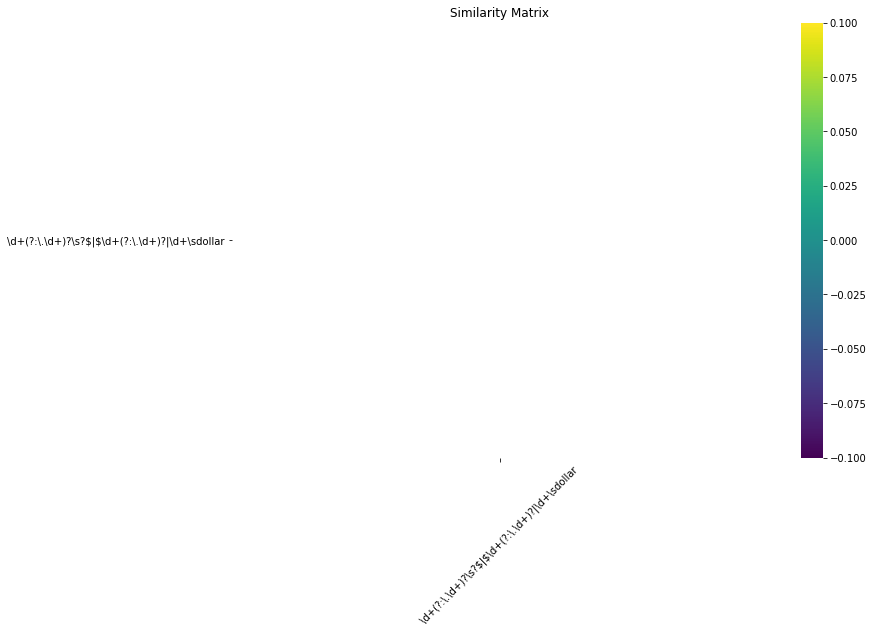

In [112]:
explore_regex.report()

> **Ex. 8.2.4** 
Finally write a function that takes in a string and outputs if there is a match. Use the .match function to see if there is a match (hint if does not return a NoneType object - `re.match(pattern,string)!=None`).

> Define a column 'mention_currency' in the dataframe, by applying the above function to the text column of the dataframe. 
*** You should have approximately 310 reviews that matches. - but less is also alright***

> **Ex. 8.2.5** Explore the relation between reviews mentioning prices and the average rating. 

> **Ex. 8.2.6 (extra)** Define a function that outputs the amount mentioned in the review (if more than one the largest), define a new column by applying it to the data, and explore whether reviews mentioning higher prices are worse than others by plotting the amount versus the rating.

In [137]:
def findPattern(string):
    pattern = '\d+(?:\.\d+)?\s?\$|\$\d+(?:\.\d+)?|\d+(?:\.\d+)?\sdollar'
    if re.search(pattern, string) != None:
        return True
    return False

df['mention_currency'] = [findPattern(x) for x in df.reviewBody]

In [144]:
# Second method
df['mention_currency'] = df['reviewBody'].apply(lambda x: findPattern(x))

In [145]:
df.mention_currency.value_counts()

False    9707
True      293
Name: mention_currency, dtype: int64

In [147]:
df.groupby('mention_currency')['reviewRating_ratingValue'].mean()

mention_currency
False    4.50170
True     3.03413
Name: reviewRating_ratingValue, dtype: float64

 **Ex. 8.2.6 (extra)** Define a function that outputs the amount mentioned in the review (if more than one the largest), define a new column by applying it to the data, and explore whether reviews mentioning higher prices are worse than others by plotting the amount versus the rating.

In [217]:
def amount(review):
    pattern = '\d+(?:\.\d+)?\s?\$|\$\d+(?:\.\d+)?|\d+(?:\.\d+)?\sdollar'
    match = re.findall(pattern, review)

    if len(match) >= 1:
        max_num = max([float(re.findall(r'\d+(?:\.\d+)?', x)[0]) for x in match])
        return max_num
    
    else:
        return None
        
    """
    # Previous solution
    if len(match) > 1:
        max_num = 0
        
        for i in range(len(match)):
            num = float(re.findall(r'\d+(?:\.\d+)?', match[i])[0])
            if num > max_num:
                max_num = num
        

    else:    
        max_num = float(re.findall(r'\d+(?:\.\d+)?', match[0])[0])

    """
    

In [221]:
df['amount'] = df.reviewBody.apply(lambda x: amount(x))

Index(['Unnamed: 0', '__domain__', 'address_@type', 'address_addressCountry',
       'address_addressLocality', 'address_postalCode',
       'address_streetAddress', 'author_@type', 'datePublished', 'email',
       'headline', 'inLanguage', 'itemReviewed_@type', 'itemReviewed_name',
       'meta_@type', 'name', 'reviewBody', 'reviewRating_@type',
       'reviewRating_ratingValue', 'telephone', 'categories',
       'mention_currency', 'amount'],
      dtype='object')

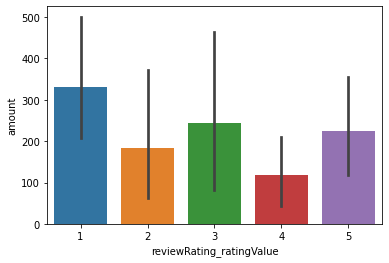

In [223]:
import seaborn as sns

sns.barplot(x="reviewRating_ratingValue", y="amount", data=df);

> **Ex. 8.2.7:** Now we write a regular expression to extract emoticons from text.
Start by locating all mouths ')' of emoticons, and develop the variations from there. Remember that paranthesis are special characters in regex, so you should use the escape character.

In [225]:
re.findall(r'(?::|;)(?:-|\^)?(?:\)|D|\(|\/|\\)', sample_string)

[':(',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)',
 ';)',
 ':-)',
 ':)',
 ':D',
 ':(',
 ':)',
 ':)',
 ':)',
 ':)',
 ':)']